# Project 4, APS1070 Summer 2024
#### **Linear Regression -  14 points**
**Deadline: July 16th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Omar Al-Hilawani
*   Your **student number**: 1008735978

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the song popularity.

For this purpose, we are going to use the [
Spotify_1Million_Tracks](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks) dataset which includes 1 Million tracks with 19 features between 2000 and 2023. The goal is to unravel patterns and predict the song `popularity` prior to its release.

In [1]:
import pandas as pd
df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Spotify_Tracks.csv',
    index_col=None
)

In [11]:
%%shell
jupyter nbconvert --to html /content/S24_APS1070_Project_4.ipynb

[NbConvertApp] Converting notebook /content/S24_APS1070_Project_4.ipynb to html
[NbConvertApp] Writing 2536019 bytes to /content/S24_APS1070_Project_4.html


Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [2]:
# Step 1
print(df)

                      track_id  popularity  danceability  energy  key  \
0       53QF56cjZA9RTuuMZDrSA6          68         0.483   0.303    4   
1       1s8tP3jP4GZcyHDsjvw218          50         0.572   0.454    3   
2       7BRCa8MPiyuvr2VU3O9W0F          57         0.409   0.234    3   
3       63wsZUhUZLlh1OsyrZq7sz          58         0.392   0.251   10   
4       6nXIYClvJAfi6ujLiKqEq8          54         0.430   0.791    6   
...                        ...         ...           ...     ...  ...   
999995  0R2YXPVPt8E4m6XlsUypLo          21         0.352   0.868    7   
999996  5ddJIWOgN6PTwNZwspAv04           0         0.422   0.705    0   
999997  1Vgs9wO9XbbWxiizRUuWbz           0         0.515   0.837    9   
999998  5jOWBsaaJ51OjhMwjdLWmT           2         0.311   0.896    8   
999999  1yOB4809l2300ed3DsYW5g           0         0.514   0.839   11   

        loudness  speechiness  acousticness  instrumentalness  liveness  \
0        -10.058       0.0429      0.694000     

In [3]:
# Step 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feature_data = df.drop(columns=['track_id','popularity'])
target_data = df['popularity']
print(feature_data)

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(feature_data, target_data, test_size=0.2, random_state=1, shuffle=True)

# Calculate the standard deviation and mean
train_std = X_train.std()
train_mean = X_train.mean()

# Standardize the data
X_train_standardized = (X_train - train_mean)/train_std
X_val_standardized = (X_val - train_mean)/train_std

# Inserting a first column of 1s
X_train_standardized.insert(0, 'bias', 1)
X_val_standardized.insert(0, 'bias', 1)

print(X_train_standardized)
print(X_val_standardized)


        danceability  energy  key  loudness  speechiness  acousticness  \
0              0.483   0.303    4   -10.058       0.0429      0.694000   
1              0.572   0.454    3   -10.286       0.0258      0.477000   
2              0.409   0.234    3   -13.711       0.0323      0.338000   
3              0.392   0.251   10    -9.845       0.0363      0.807000   
4              0.430   0.791    6    -5.419       0.0302      0.072600   
...              ...     ...  ...       ...          ...           ...   
999995         0.352   0.868    7    -4.871       0.0491      0.000092   
999996         0.422   0.705    0    -3.675       0.0303      0.000918   
999997         0.515   0.837    9    -7.457       0.0526      0.055500   
999998         0.311   0.896    8    -4.601       0.0505      0.000172   
999999         0.514   0.839   11    -6.257       0.0448      0.004330   

        instrumentalness  liveness  valence    tempo  duration_ms  \
0               0.000000    0.1150    0.13

**3. Explain why we should not insert the column of $1$s prior to standardization.**

Standardization requires the features to be scaled so there standard deviation would be equal to 1 and there mean equal to 0. We should not insert the column of 1s prior to standardization because this column will be standardized. This means its values will not be 1 anymore.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy import linalg

W = np.dot(linalg.inv(np.dot(X_train_standardized.T, X_train_standardized)), np.dot(X_train_standardized.T, y_train)) # Train the model using training set: finding weights

y_pred_train = np.dot(X_train_standardized, W) # prediction on the training set
y_pred_valid = np.dot(X_val_standardized, W) # prediction on the validation set

# Compute RMSE for training and validation sets
RMSE_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
RMSE_valid = np.sqrt(mean_squared_error(y_pred_valid, y_val))

print(W)
print(f"RMSE for training set: {RMSE_train}")
print(f"RMSE for validation set: {RMSE_valid}")



[18.95162625  2.24112076 -2.08359871  0.019801    1.84249926 -0.50749059
 -1.15490771 -2.18760852 -0.68061627 -2.58691499  0.07464918 -1.87898568
  0.12558043]
RMSE for training set: 15.55616997670315
RMSE for validation set: 15.555098035726


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.05$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.0005 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.0005$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.0001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

Converged at epoch 108


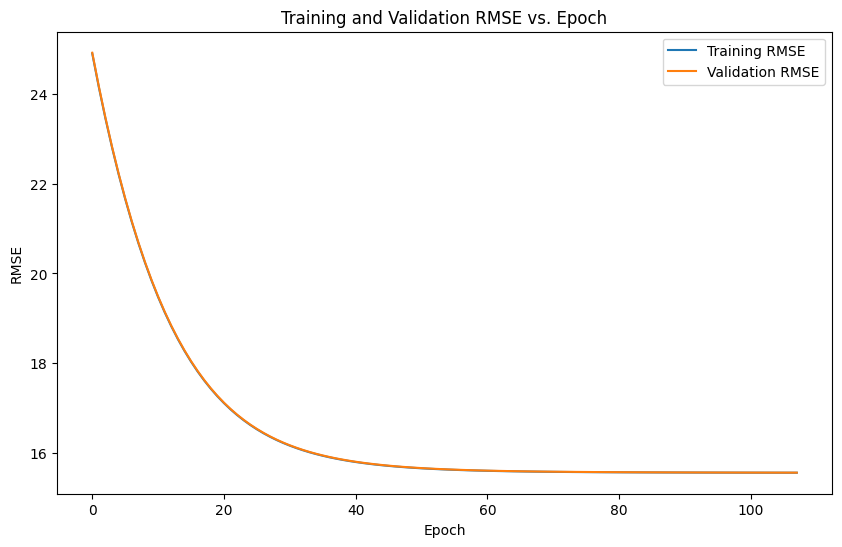

--- Total Training Time: 22.971936225891113 (s) ---


In [5]:
import time
import matplotlib.pyplot as plt

# Records current time
start_time = time.time()

np.random.seed(2)

# Weights
w = (np.random.random(X_train_standardized.shape[1]))*0.0001

# Learning Rate
lr = 0.05
CT = RMSE_valid * 1.0005

train_rmse_list = []
val_rmse_list = []

## GD Script -- Sample code in tutorial! ##

for epoch in range(0,5000):

    y_train_pred = np.dot(X_train_standardized, w)
    y_val_pred = np.dot(X_val_standardized, w)

    val_rmse = np.sqrt(mean_squared_error(y_val_pred, y_val))
    train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train ))

    val_rmse_list.append(val_rmse)
    train_rmse_list.append(train_rmse)

    gradient = (1 / len(y_train_pred) * np.dot(X_train_standardized.T, (y_train_pred - y_train)))
    w = w - lr * gradient


    # Check for convergence
    if val_rmse <= CT:
        print(f"Converged at epoch {epoch + 1}")
        break


# Plotting RMSE vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_list, label='Training RMSE')
plt.plot(val_rmse_list, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Epoch')
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))


**Comment on overfitting/underfitting by observing the training and validation RMSE**
As seen in the plot above, there is no overfitting or underfitting when looking at the training and validation RMSE.


**Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)?**

An epoch in Gradient descent algorithm requires the calculating the gradient of the loss function in relation to all of the training examples after which it updates the parameters of the model

An iteration in Gradient descent algorithm is similar to an epoch. This is because the parameters of the model are updated only one time for the entire dataset.



## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.05$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

Testing batch size: 2
Stopped at epoch 3 due to increasing RMSE
Testing batch size: 4
Stopped at epoch 9 due to increasing RMSE
Testing batch size: 8
Stopped at epoch 12 due to increasing RMSE
Testing batch size: 16
Stopped at epoch 13 due to increasing RMSE
Testing batch size: 32
Stopped at epoch 3 due to increasing RMSE
Testing batch size: 64
Stopped at epoch 6 due to increasing RMSE
Testing batch size: 128
Stopped at epoch 6 due to increasing RMSE
Testing batch size: 256
Batch size 256 converged in 2.87 seconds
Testing batch size: 512
Testing batch size: 1024
Testing batch size: 2048
Testing batch size: 4096
Testing batch size: 8192
Batch size 8192 converged in 0.60 seconds
Testing batch size: 16384
Batch size 16384 converged in 0.89 seconds
Testing batch size: 32768
Batch size 32768 converged in 1.50 seconds
Testing batch size: 65536
Batch size 65536 converged in 4.22 seconds
Testing batch size: 131072
Batch size 131072 converged in 4.91 seconds
Testing batch size: 262144
Batch siz

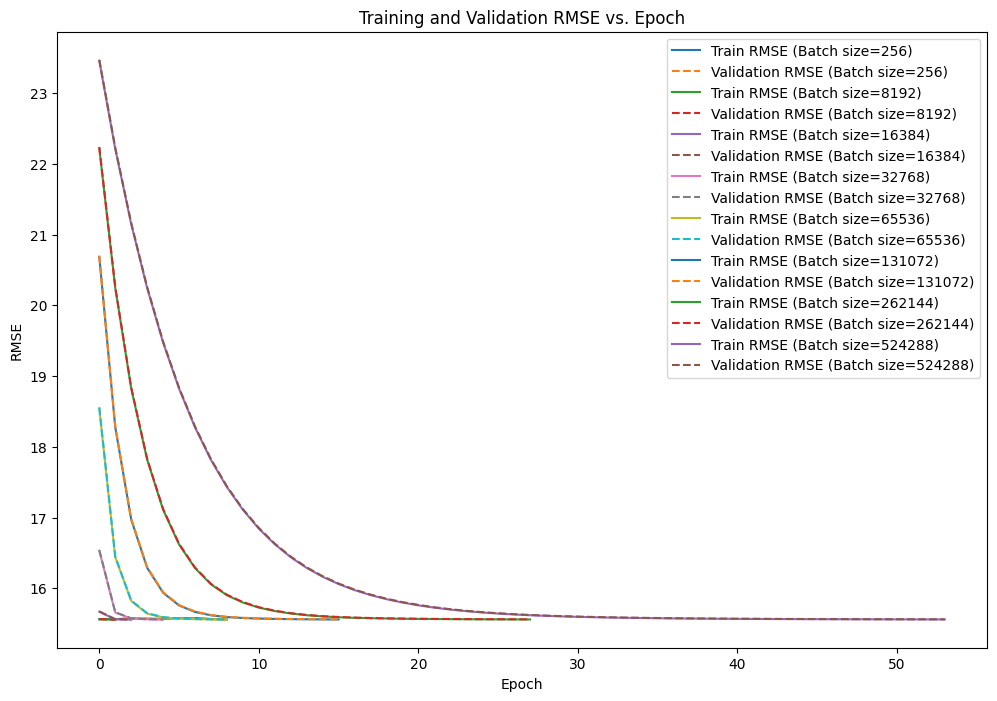

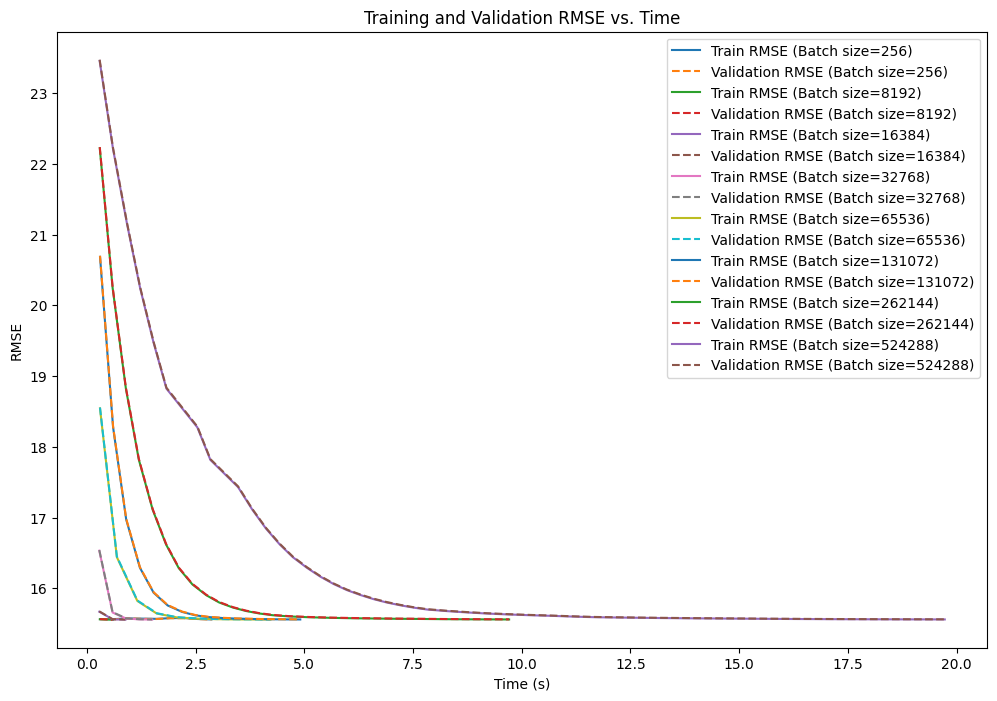

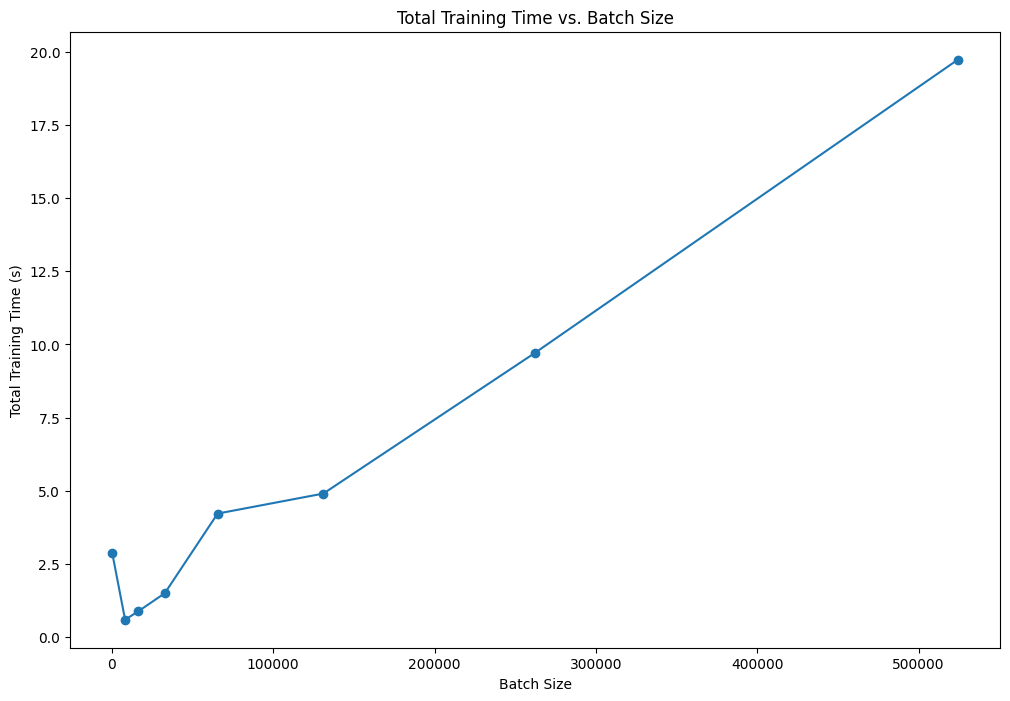

In [6]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, lr, CT):
    start_time = time.time()  # Start the timer
    np.random.seed(100)
    w = (np.random.random(X_train.shape[1])) * 0.0001  # Initial weights

    train_rmse_list = []
    val_rmse_list = []
    elapsed_time_list = []

    epoch = 0
    while True:
        # Shuffle the training data
        permutation = np.random.permutation(len(y_train))
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(0, len(y_train), batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            y_train_pred = np.dot(X_batch, w)
            gradient = (1 / len(y_batch)) * np.dot(X_batch.T, (y_train_pred - y_batch))
            w = w - lr * gradient

        # Calculate RMSE for training and validation sets
        y_train_pred_full = np.dot(X_train, w)
        y_val_pred = np.dot(X_val, w)

        train_rmse = np.sqrt(mean_squared_error(y_train_pred_full, y_train))
        val_rmse = np.sqrt(mean_squared_error(y_val_pred, y_val))

        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        elapsed_time_list.append(time.time() - start_time)

        # Check for convergence
        if val_rmse <= CT or epoch >= 5000:
            break

        # Stop training if RMSE is increasing consistently
        if epoch > 1 and (val_rmse > val_rmse_list[-2] > val_rmse_list[-3]):
            print(f"Stopped at epoch {epoch + 1} due to increasing RMSE")
            break

        epoch += 1

    return w, train_rmse_list, val_rmse_list, elapsed_time_list

# Different Batch Sizes
batch_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]
# Learning Rate
learning_rate = 0.05
# Convergence Threshold
convergence_threshold = 1.0005 * RMSE_valid

# Dictionary to store results
results = {}
for batch_size in batch_sizes:
    print(f"Testing batch size: {batch_size}")
    w, train_rmse, val_rmse, elapsed_time = mini_batch_gradient_descent(
        X_train_standardized.values, y_train.values,
        X_val_standardized.values, y_val.values,
        batch_size, learning_rate, convergence_threshold
    )
    # Only consider the batches that converge
    if len(train_rmse) > 1 and not (val_rmse[-1] > val_rmse[-2] > val_rmse[-3]):
        results[batch_size] = { 'train_rmse': train_rmse, 'val_rmse': val_rmse, 'elapsed_time': elapsed_time }
        # Print the total training time for this batch size
        print(f"Batch size {batch_size} converged in {elapsed_time[-1]:.2f} seconds")

# Plot training and validation RMSE vs. epoch
plt.figure(figsize=(12, 8))
for batch_size, data in results.items():
    plt.plot(data['train_rmse'], label=f'Train RMSE (Batch size={batch_size})')
    plt.plot(data['val_rmse'], label=f'Validation RMSE (Batch size={batch_size})', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Epoch')
plt.legend()
plt.show()

# Plot training and validation RMSE vs. time
plt.figure(figsize=(12, 8))
for batch_size, data in results.items():
    plt.plot(data['elapsed_time'], data['train_rmse'], label=f'Train RMSE (Batch size={batch_size})')
    plt.plot(data['elapsed_time'], data['val_rmse'], label=f'Validation RMSE (Batch size={batch_size})', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Time')
plt.legend()
plt.show()

# Plot total training time vs. batch size
total_training_times = [data['elapsed_time'][-1] for data in results.values()]
converged_batch_sizes = list(results.keys())
plt.figure(figsize=(12, 8))
plt.plot(converged_batch_sizes, total_training_times, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (s)')
plt.title('Total Training Time vs. Batch Size')
plt.show()


**Describe your findings, including the main takeaways from each of your plots.**

Plot 1: Training and Validation RMSE vs. Epoch
- The RMSE values decrease as the epochs increase. This means that the model is bettering its predictions as time goes by. Also, it does not show any noticeable underfitting or overfitting. The main takeaway is that while larger batch sizes require more epochs to converge, they provide a smoother and more stable training process. On the other hand, smaller batch sizes, although they may exhibit higher variability, tend to converge much faster. This means that large batch sizes help avoid local minima and ensure better generalization, whereas small batch sizes allow for quicker updates and faster convergence.

Plot 2: Training and Validation RMSE vs. Time
- The RMSE values decrease as time increases. This indicates that as more time is spent training, the model continues to become better. Also, it does not show any noticeable underfitting or overfitting. The main takeaway from this plot is that small batch sizes are useful in obtianing improvements in the initial run but might not be the most efficient in obtaining final covergence when compared with large batch sizes that are initially slow to lower the RMSE but are best utilized for long term training as they are much more reliable and stable.

Plot 3: Total Training Time vs. Batch Size
- As the number of batches increased, the total training time increased. This is because as the batch sizes become larger, each epoch contains more data that is being processed. The relationship in non-linear. The main takeway from this plot is that larger batch sizes take longer time to train but require less epochs in the end and might be more stable when compared to small batch sizes that takke less time to train but might require more epochs so it can converge.

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.05$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [7]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error

def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, lr, CT):
    start_time = time.time()  # Start the timer
    np.random.seed(2)
    w = (np.random.random(X_train.shape[1])) * 0.0001  # Initial weights

    train_rmse_list = []
    val_rmse_list = []
    elapsed_time_list = []

    epoch = 0
    while True:
        # Shuffle the training data
        permutation = np.random.permutation(len(y_train))
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(0, len(y_train), batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            y_train_pred = np.dot(X_batch, w)
            gradient = (1 / len(y_batch)) * np.dot(X_batch.T, (y_train_pred - y_batch))
            w = w - lr * gradient

        # Calculate RMSE for training and validation sets
        y_train_pred_full = np.dot(X_train, w)
        y_val_pred = np.dot(X_val, w)

        train_rmse = np.sqrt(mean_squared_error(y_train_pred_full, y_train))
        val_rmse = np.sqrt(mean_squared_error(y_val_pred, y_val))

        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        elapsed_time_list.append(time.time() - start_time)

        # Check for convergence
        if val_rmse <= CT or epoch >= 5000:
            break

        # Stop training if RMSE is increasing consistently
        if epoch > 1 and (val_rmse > val_rmse_list[-2] > val_rmse_list[-3]):
            print(f"Stopped at epoch {epoch + 1} due to increasing RMSE")
            break

        epoch += 1

    return w, train_rmse_list, val_rmse_list, elapsed_time_list

def find_converging_lr(X_train, y_train, X_val, y_val, batch_size, initial_lr, CT):
    lr = initial_lr
    while True:
        w, train_rmse, val_rmse, elapsed_time = mini_batch_gradient_descent(
            X_train, y_train,
            X_val, y_val,
            batch_size, lr, CT
        )
        if len(train_rmse) > 1 and not (val_rmse[-1] > val_rmse[-2] > val_rmse[-3]):
            return lr, train_rmse[-1], val_rmse[-1]
        lr /= 2  # Reduce the learning rate by half if it doesn't converge

# Select batch sizes that did not converge with lr = 0.05
non_converging_batch_sizes = [2, 4, 8]  # Example batch sizes that did not converge
initial_learning_rate = 0.0005
CT = 1.0005 * RMSE_valid

results_lr = []
for batch_size in non_converging_batch_sizes:
    lr, train_rmse, val_rmse = find_converging_lr(
        X_train_standardized.values, y_train.values,
        X_val_standardized.values, y_val.values,
        batch_size, initial_learning_rate, CT
    )
    results_lr.append((batch_size, lr, train_rmse, val_rmse))

# Display the results in a table
results_lr_df = pd.DataFrame(results_lr, columns=['Batch Size', 'Learning Rate', 'Train RMSE', 'Validation RMSE'])
print(results_lr_df)


   Batch Size  Learning Rate  Train RMSE  Validation RMSE
0           2       0.000500   15.559734        15.558489
1           4       0.000016   15.559407        15.560361
2           8       0.000031   15.559407        15.560361


Testing learning rate: 0.0025
Testing learning rate: 0.005
Testing learning rate: 0.01
Testing learning rate: 0.02
Testing learning rate: 0.03
Testing learning rate: 0.04
Testing learning rate: 0.05
Testing learning rate: 0.06
Testing learning rate: 0.07
Testing learning rate: 0.08
Testing learning rate: 0.09
Testing learning rate: 0.1
Testing learning rate: 0.15


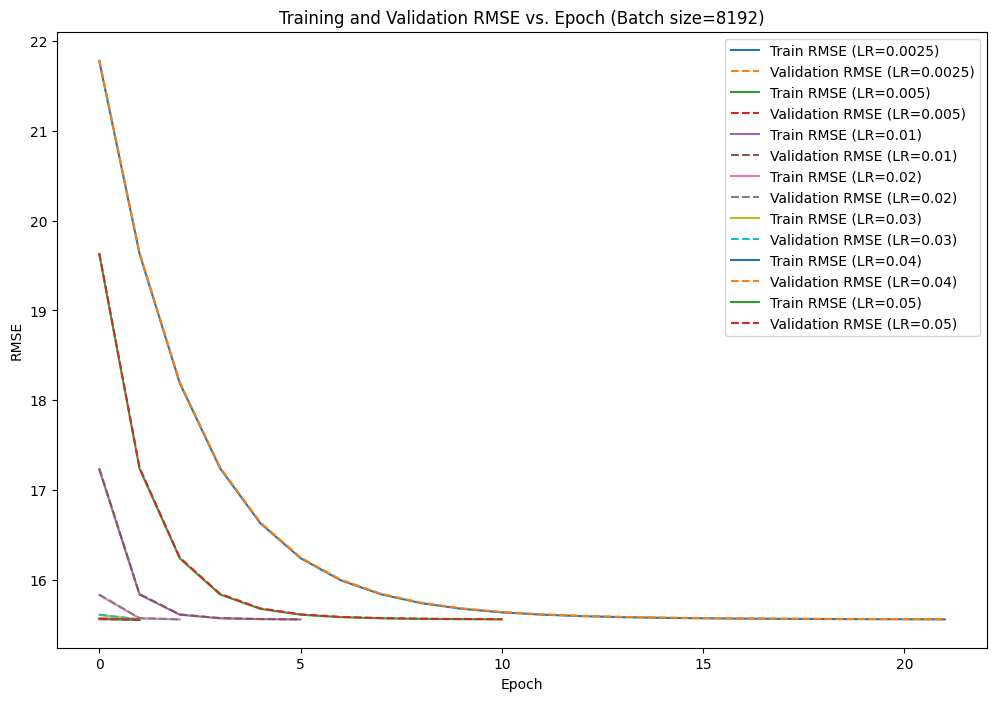

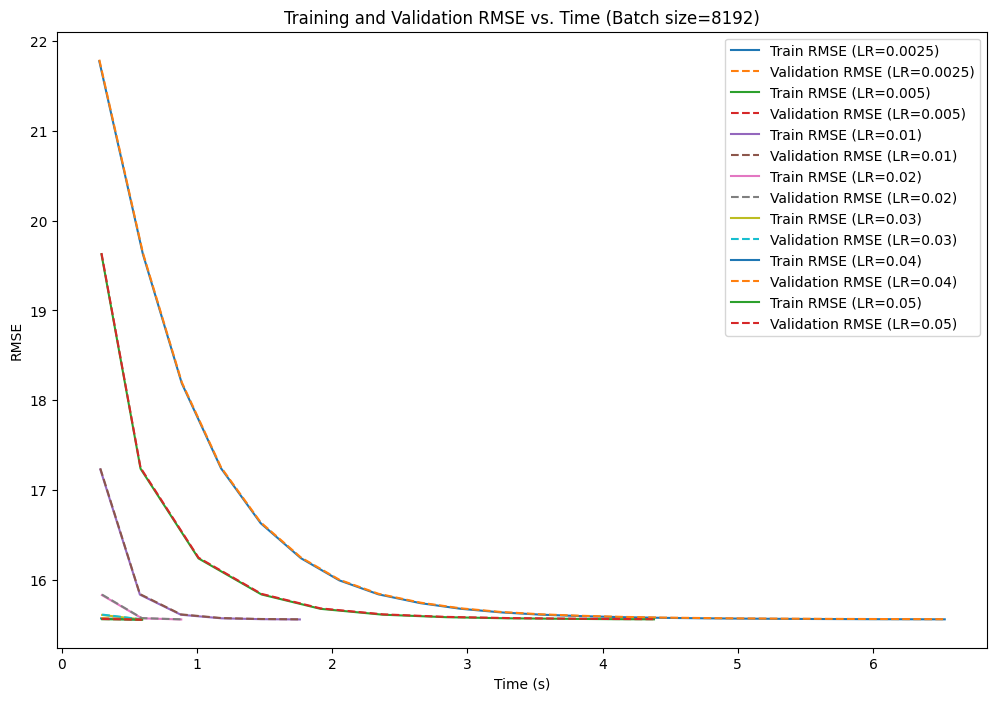

In [8]:

best_batch_size = 8192
learning_rates = [0.0025, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15]

sweep_results = {}
for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    w, train_rmse, val_rmse, elapsed_time = mini_batch_gradient_descent(
        X_train_standardized.values, y_train.values,
        X_val_standardized.values, y_val.values,
        best_batch_size, lr, CT
    )
    if len(train_rmse) > 1:  # Consider only converged cases
        sweep_results[lr] = {
            'train_rmse': train_rmse,
            'val_rmse': val_rmse,
            'elapsed_time': elapsed_time
        }

# Plot training and validation RMSE vs. epoch
plt.figure(figsize=(12, 8))
for lr, data in sweep_results.items():
    plt.plot(data['train_rmse'], label=f'Train RMSE (LR={lr})')
    plt.plot(data['val_rmse'], label=f'Validation RMSE (LR={lr})', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title(f'Training and Validation RMSE vs. Epoch (Batch size={best_batch_size})')
plt.legend()
plt.show()

# Plot training and validation RMSE vs. time
plt.figure(figsize=(12, 8))
for lr, data in sweep_results.items():
    plt.plot(data['elapsed_time'], data['train_rmse'], label=f'Train RMSE (LR={lr})')
    plt.plot(data['elapsed_time'], data['val_rmse'], label=f'Validation RMSE (LR={lr})', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title(f'Training and Validation RMSE vs. Time (Batch size={best_batch_size})')
plt.legend()
plt.show()


**Describe your findings, including the main takeaways from each of your plots.**

Plot 1: Training and Validation RMSE vs. Epoch
As seen from plot 1, the learning rates 0.01 tell 0.05 quickly converge within the first epochs, but 0.0005 and 0.0025 converge slower. Learning rates 0.04 and 0.05  do not show many fluctuations and are stable. Main takeaway learning rates 0.02 and 0.05 provide a good balance between how fast it converges and how stable it is.

Plot 2: Training and Validation RMSE vs. Time
When learning rates from 0.02 tell 0.05 conerge much faster but 0.0025 and 0.0005 take longer but achieve similar RMSE values. Also, we need to keep in mind that there is clear trade-off between how fast it converges and stability.
